<!-- https://github.com/lcarcamo1526/Amazon-Reviews-Analysis -->
https://github.com/lcarcamo1526/Amazon-Reviews-Analysis/blob/master/amazon_alexa.tsv

In [1]:
#General Imports
import numpy as np
import pandas as pd
import pickle 
from os.path import join

#Preprocessing related imports 
from nltk.stem import WordNetLemmatizer
import gensim.parsing.preprocessing as gpp
import gensim.utils as gu

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
# import tensorflow_text as text
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

import string
import nltk
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data reading

In [3]:
df_train=pd.read_csv("/content/amazon_alexa.tsv",sep='\t')

In [4]:
df_train.info() # showing information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df_train.head() # displaying the first 5 rows of the data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
df_train['feedback'].value_counts() # value counts for feedback

1    2893
0     257
Name: feedback, dtype: int64

In [7]:
df_train['rating'].value_counts() # value counts for ratings

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

# Exploratory data analysis and pre processing

<Axes: xlabel='rating', ylabel='count'>

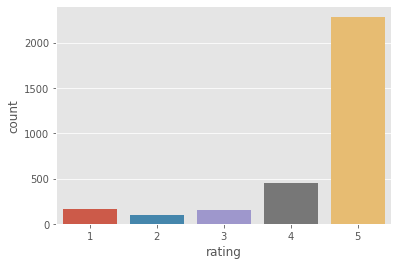

In [8]:
sns.countplot(x ='rating', data = df_train)

In [10]:
def  processing_data(text): # preprocessing the data
  text=str(text)
  list_preprocess=[gpp.strip_tags, gpp.strip_punctuation, gpp.strip_multiple_whitespaces, gpp.strip_numeric, gpp.remove_stopwords, gpp.strip_short]
  for proc in list_preprocess:
    text=proc(text)  
  return text

In [11]:
df_train["verified_reviews"] = df_train["verified_reviews"].apply(processing_data)

In [12]:
df_train.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love Echo,1
1,5,31-Jul-18,Charcoal Fabric,Loved,1
2,4,31-Jul-18,Walnut Finish,Sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing old learns dinosaurs control lig...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,received echo gift needed Bluetooth play music...,1
6,3,31-Jul-18,Sandstone Fabric,Without having cellphone use features iPad use...,1
7,5,31-Jul-18,Charcoal Fabric,think purchased working getting room house lik...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love I’ve listened songs haven’t heard childho...,1


* tokenizing

In [13]:
rev_tokenized = df_train['verified_reviews'].apply(lambda x: x.split()) # tokenizing the tweets
print(rev_tokenized)

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, old, learns, dinosaurs, cont...
4                                                 [Music]
                              ...                        
3145                              [Perfect, kids, adults]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, lights, ...
3148    [Only, complaint, sound, quality, isn, great, ...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object


In [14]:
# import these modules
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer  
Lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


* lemmatizing

In [15]:
def Lemmatization(tweet):
  lemmatized_tweet = ' '.join([Lemmatizer.lemmatize(tw) for tw in tweet])
  return lemmatized_tweet

In [16]:
rev_lemmatized = rev_tokenized.apply(Lemmatization)
print(rev_lemmatized)

0                                               Love Echo
1                                                   Loved
2       Sometimes playing game answer question correct...
3       lot fun thing old learns dinosaur control ligh...
4                                                   Music
                              ...                        
3145                                    Perfect kid adult
3146    Listening music searching location checking ti...
3147    love thing running entire home light thermosta...
3148    Only complaint sound quality isn great use com...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object


In [17]:
df_train['Processed_Reviews']= rev_lemmatized

In [18]:
df_train.sample(10)

,rating,date,variation,verified_reviews,feedback,Processed_Reviews
1351,4,19-Jul-18,White Spot,The echo spot great got easy set problem When ...,1,The echo spot great got easy set problem When ...
1663,5,28-Jul-18,Black Show,pleased Echo Show love nice features highly re...,1,pleased Echo Show love nice feature highly rec...
2895,5,30-Jul-18,Black Dot,Love Don’t know took long don’t know didn’t Am...,1,Love Don’t know took long don’t know didn’t Am...
824,5,30-Jul-18,Charcoal Fabric,far nice item picks voice understands problems...,1,far nice item pick voice understands problem T...
10,5,30-Jul-18,Charcoal Fabric,sent year old Dad talks constantly,1,sent year old Dad talk constantly
450,5,4-Jul-18,Black,Excellent product mint condition refurbished u...,1,Excellent product mint condition refurbished u...
1168,5,29-Jul-18,Black Spot,wanted security video cameras having use phone...,1,wanted security video camera having use phone ...
1277,2,24-Jul-18,Black Spot,ALEXA NOT SMART SIRI CANNOT CANCEL SNOOZE AFTE...,0,ALEXA NOT SMART SIRI CANNOT CANCEL SNOOZE AFTE...
2744,5,30-Jul-18,Black Dot,Does expected,1,Does expected
165,5,30-Jul-18,Charcoal Fabric,Easy set,1,Easy set


* plotting word clouds

In [19]:
from wordcloud import WordCloud

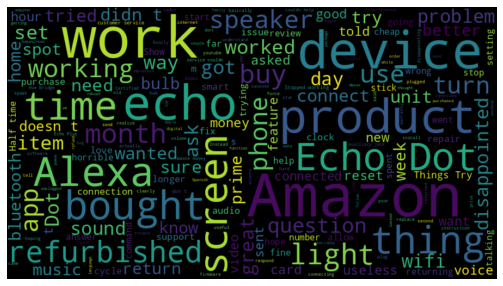

In [40]:
rating_1 = ' '.join([text for text in df_train['Processed_Reviews'][df_train['rating'] == 1]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(rating_1)
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

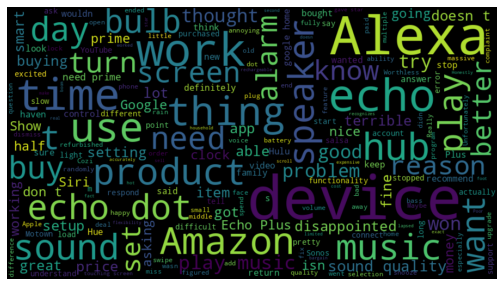

In [41]:
rating_2 = ' '.join([text for text in df_train['Processed_Reviews'][df_train['rating'] == 2]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(rating_2)
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

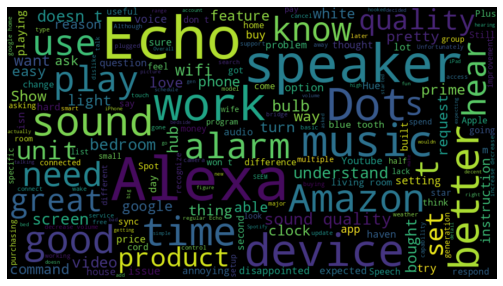

In [42]:
rating_3 = ' '.join([text for text in df_train['Processed_Reviews'][df_train['rating'] == 3]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(rating_3)
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

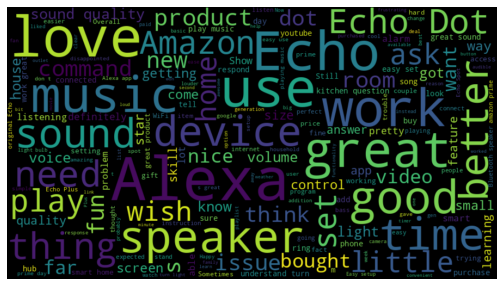

In [43]:
rating_4 = ' '.join([text for text in df_train['Processed_Reviews'][df_train['rating'] == 4]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(rating_4)
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

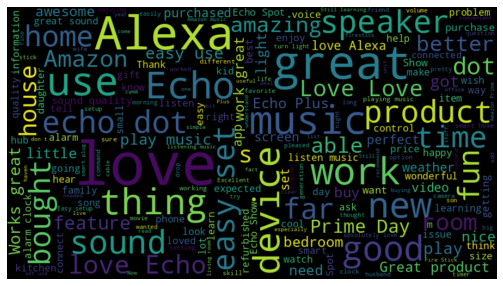

In [44]:
rating_5 = ' '.join([text for text in df_train['Processed_Reviews'][df_train['rating'] == 5]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(rating_5)
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

* TFID VECTORIZING

In [25]:
#determining TF-IDF Features of the words in the dataset. 
TfId_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf = TfId_vectorizer.fit_transform(df_train['Processed_Reviews'] )

In [26]:
# tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=25, max_features=5000, use_idf=True)
# tfidf = tfidf_vectorizer.fit_transform(df_train["Processed_Reviews"])

In [27]:
print(tfidf)

  (0, 811)	0.7747178986297343
  (0, 378)	0.47853039596709496
  (0, 802)	0.4133047757748559
  (1, 837)	1.0
  (2, 1424)	0.22652028367301863
  (2, 741)	0.2659079877432371
  (2, 79)	0.2659079877432371
  (2, 620)	0.15734165974017963
  (2, 115)	0.23303694723397578
  (2, 736)	0.17318103652622077
  (2, 1422)	0.1844243397389935
  (2, 1)	0.18071610431899193
  (2, 740)	0.12162360643169273
  (2, 1580)	0.25740128620635105
  (2, 544)	0.17126027996521695
  (2, 1157)	0.23447459073904375
  (2, 37)	0.11754993530853487
  (2, 276)	0.27275196571564586
  (2, 1076)	0.19198014589510973
  (2, 78)	0.4247852786838776
  (2, 510)	0.231648046906476
  (2, 1009)	0.20190739811882819
  (2, 1240)	0.25740128620635105
  (3, 1010)	0.22315453803030905
  (3, 926)	0.28649897141466046
  :	:
  (3148, 946)	0.19695702728655207
  (3148, 244)	0.1894276844068018
  (3148, 683)	0.18684792978910658
  (3148, 396)	0.22913933889559138
  (3148, 701)	0.19695702728655207
  (3148, 1213)	0.20918787419834775
  (3148, 631)	0.19869959906844167
  

# Model building

* testing and training data splitting

In [28]:
X=tfidf #Tf_vector
y = df_train['rating'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report,f1_score,accuracy_score
# from sklearn.metrics import classification_
from sklearn.metrics import accuracy_score

* Gradient booster classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
# model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
acc_1=accuracy* 100
print(f"Accuracy of Gradient Bo0sting classifer {acc_1:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Gradient Bo0sting classifer 75.56 %
  
              precision    recall  f1-score   support

           1       0.64      0.22      0.33        32
           2       0.73      0.31      0.43        26
           3       0.53      0.28      0.37        32
           4       0.62      0.14      0.23        90
           5       0.77      0.98      0.86       450

    accuracy                           0.76       630
   macro avg       0.66      0.39      0.44       630
weighted avg       0.73      0.76      0.70       630



* Logistic regression classifier

In [31]:
model = LogisticRegression(multi_class='multinomial')
# model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
acc_2=accuracy* 100
print(f"Accuracy of Logistic Regression {acc_2:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Logistic Regression 72.70 %
  
              precision    recall  f1-score   support

           1       0.60      0.09      0.16        32
           2       0.00      0.00      0.00        26
           3       0.80      0.12      0.22        32
           4       0.41      0.08      0.13        90
           5       0.74      0.99      0.84       450

    accuracy                           0.73       630
   macro avg       0.51      0.26      0.27       630
weighted avg       0.66      0.73      0.64       630



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Random forest classifier

In [32]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
acc_3=accuracy* 100
print(f"Accuracy of Logistic Regression {acc_3:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Logistic Regression 80.48 %
  
              precision    recall  f1-score   support

           1       0.92      0.38      0.53        32
           2       1.00      0.31      0.47        26
           3       0.77      0.31      0.44        32
           4       0.76      0.39      0.51        90
           5       0.80      0.98      0.88       450

    accuracy                           0.80       630
   macro avg       0.85      0.47      0.57       630
weighted avg       0.81      0.80      0.77       630



* Linear support vector classifier

In [33]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
acc_4=acc* 100
print(f"Accuracy of Support vector classifier {acc_4:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Support vector classifier 76.67 %
  
              precision    recall  f1-score   support

           1       0.54      0.47      0.50        32
           2       0.82      0.35      0.49        26
           3       0.52      0.41      0.46        32
           4       0.48      0.28      0.35        90
           5       0.82      0.94      0.87       450

    accuracy                           0.77       630
   macro avg       0.63      0.49      0.53       630
weighted avg       0.74      0.77      0.74       630



* Multinomial naive bayes classifier

In [34]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
acc_5=acc* 100
print(f"Accuracy of Multinomial Naive Bayes {acc_5:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Multinomial Naive Bayes 72.54 %
  
              precision    recall  f1-score   support

           1       1.00      0.03      0.06        32
           2       0.00      0.00      0.00        26
           3       1.00      0.06      0.12        32
           4       0.57      0.04      0.08        90
           5       0.73      1.00      0.84       450

    accuracy                           0.73       630
   macro avg       0.66      0.23      0.22       630
weighted avg       0.70      0.73      0.62       630



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(f"The accuracy of Gradient boosting classifier is {acc_1:.2f} %")
print(f"The accuracy of Logistic Regression is {acc_2:.2f} %")
print(f"The accuracy of Random Forest classifier is {acc_3:.2f} %")
print(f"The accuracy of Linear SVC is {acc_4:.2f} %")
print(f"The accuracy of Multinomial naive bayes classifier is {acc_5:.2f} %")

The accuracy of Gradient boosting classifier is 75.56 %
The accuracy of Logistic Regression is 72.70 %
The accuracy of Random Forest classifier is 80.48 %
The accuracy of Linear SVC is 76.67 %
The accuracy of Multinomial naive bayes classifier is 72.54 %


* Random forest is the best classifier for this data.